In [1]:
! wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-06-20 13:06:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 2607:f8b0:4001:c14::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   125MB/s    in 0.5s    

2020-06-20 13:06:33 (125 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
!unzip /tmp/cats_and_dogs_filtered.zip

In [3]:
import os
base_dir ='/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [4]:
cats_fnames = os.listdir(train_cats_dir)
print(cats_fnames[:10])
dogs_fnames = os.listdir(train_dogs_dir)
print(dogs_fnames)

['cat.842.jpg', 'cat.903.jpg', 'cat.746.jpg', 'cat.661.jpg', 'cat.672.jpg', 'cat.366.jpg', 'cat.362.jpg', 'cat.237.jpg', 'cat.387.jpg', 'cat.918.jpg']
['dog.376.jpg', 'dog.768.jpg', 'dog.179.jpg', 'dog.801.jpg', 'dog.536.jpg', 'dog.121.jpg', 'dog.223.jpg', 'dog.909.jpg', 'dog.811.jpg', 'dog.251.jpg', 'dog.871.jpg', 'dog.970.jpg', 'dog.70.jpg', 'dog.655.jpg', 'dog.875.jpg', 'dog.57.jpg', 'dog.755.jpg', 'dog.165.jpg', 'dog.735.jpg', 'dog.509.jpg', 'dog.781.jpg', 'dog.148.jpg', 'dog.328.jpg', 'dog.952.jpg', 'dog.884.jpg', 'dog.244.jpg', 'dog.620.jpg', 'dog.265.jpg', 'dog.43.jpg', 'dog.280.jpg', 'dog.146.jpg', 'dog.460.jpg', 'dog.677.jpg', 'dog.958.jpg', 'dog.914.jpg', 'dog.42.jpg', 'dog.698.jpg', 'dog.997.jpg', 'dog.675.jpg', 'dog.357.jpg', 'dog.639.jpg', 'dog.89.jpg', 'dog.505.jpg', 'dog.14.jpg', 'dog.353.jpg', 'dog.364.jpg', 'dog.731.jpg', 'dog.109.jpg', 'dog.850.jpg', 'dog.880.jpg', 'dog.966.jpg', 'dog.683.jpg', 'dog.926.jpg', 'dog.841.jpg', 'dog.485.jpg', 'dog.971.jpg', 'dog.428.jpg',

In [6]:
print("train cats:",len(cats_fnames))
print("train dogs:",len(dogs_fnames))
print("valid cats:",len(os.listdir(validation_cats_dir)))
print("valid dogs:",len(os.listdir(validation_dogs_dir)))


train cats: 1000
train dogs: 1000
valid cats: 500
valid dogs: 500


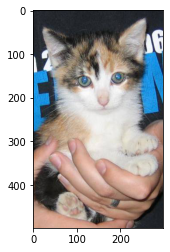

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
#i = np.random.randint(1,len(cats_fnames))
#plt.imshow(os.path.join(train_cats_dir,))
for i in cats_fnames[:10]:
  img_path = os.path.join(train_cats_dir,i)
  img = mpimg.imread(img_path)
  plt.imshow(img)




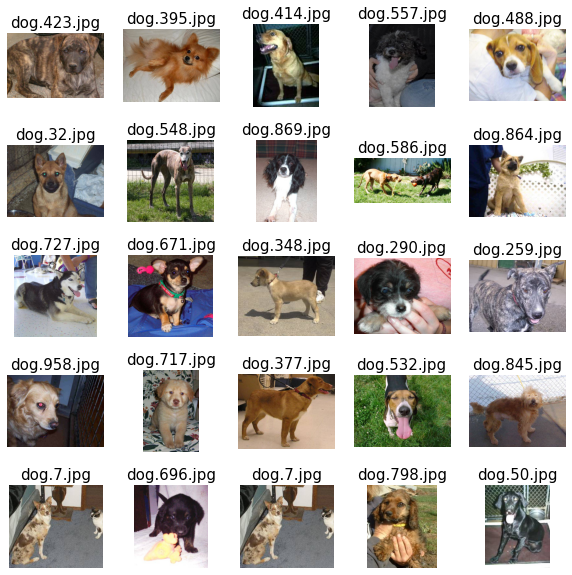

In [8]:
import random
W_grid = 5
L_grid = 5

fig , axes = plt.subplots(L_grid,W_grid,figsize=(10,10))
axes = axes.ravel()
#n_training = len(X_train)

for i in np.arange(0,W_grid*L_grid):
  #index = np.random.randint(0,len(cats_fnames))
  index=random.choice(dogs_fnames)
  img_path = os.path.join(train_dogs_dir,index)
  img = mpimg.imread(img_path)
  #plt.imshow(img)
  axes[i].imshow(img)
  axes[i].set_title(index, fontsize = 15)
 # axes[i].set_title(y_train[index], fontsize = 15)
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    validation_split=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)




train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    subset='training',
                                                    class_mode='binary',
                                                    )


validation_generator = train_datagen.flow_from_directory(train_dir,
                                                     target_size=(150,150),
                                                    batch_size=20,
                                                     subset='validation',
                                                    class_mode='binary',
                                                    )


test_generator = test_datagen.flow_from_directory(validation_dir,
                                                     target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    )

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [28]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

# 1 - Convolution
model.add(Conv2D(16,(3,3), padding='same', input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(32,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Flattening
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

opt = RMSprop(0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
activation_4 (Activation)    (None, 150, 150, 16)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
activation_5 (Activation)    (None, 75, 75, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)       

In [32]:
history = model.fit(
    x=train_generator,
    steps_per_epoch=80,
    epochs=50,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose=1
)

Epoch 1/50
80/80 [==============================] - 15s 190ms/step - loss: 0.5766 - accuracy: 0.6994 - val_loss: 0.6065 - val_accuracy: 0.6600
Epoch 2/50
80/80 [==============================] - 15s 194ms/step - loss: 0.5900 - accuracy: 0.6906 - val_loss: 0.5740 - val_accuracy: 0.6800
Epoch 3/50
80/80 [==============================] - 15s 193ms/step - loss: 0.5765 - accuracy: 0.6900 - val_loss: 0.5656 - val_accuracy: 0.7400
Epoch 4/50
80/80 [==============================] - 15s 192ms/step - loss: 0.5859 - accuracy: 0.7081 - val_loss: 0.5532 - val_accuracy: 0.6900
Epoch 5/50
80/80 [==============================] - 15s 191ms/step - loss: 0.5828 - accuracy: 0.6925 - val_loss: 0.6680 - val_accuracy: 0.6000
Epoch 6/50
80/80 [==============================] - 15s 191ms/step - loss: 0.5618 - accuracy: 0.7163 - val_loss: 0.5223 - val_accuracy: 0.7300
Epoch 7/50
80/80 [==============================] - 15s 193ms/step - loss: 0.5771 - accuracy: 0.6956 - val_loss: 0.5297 - val_accuracy: 0.6900

In [ ]:
history.history.keys()

Text(0.5, 0, 'epochs')

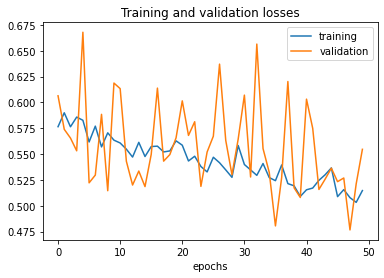

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

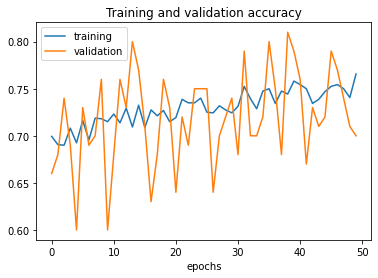

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')

In [ ]:
#test_generator = test_datagen.flow_from_directory(
 #   test_dir,
  #  target_size=(224, 224),
   # batch_size=50,
    #class_mode='binary')

#test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
#print('test acc:', test_acc)

In [35]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

test acc: 0.765999972820282


In [36]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  img = image.load_img(path , target_size=(150,150))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)

  print(classes)
 

  #if classes[0]==0:

   # print(fn+"is a dog")
  #else:
   # print(fn+'is a cat')


Saving dog-puppy-on-garden-royalty-free-image-1586966191.jpg to dog-puppy-on-garden-royalty-free-image-1586966191.jpg
Saving dog.jpeg to dog.jpeg
Saving catty7.jpeg to catty7.jpeg
Saving catttt.jpg to catttt.jpg
Saving 1800x1200_cats_and_excessive_meowing_ref_guide.jpg to 1800x1200_cats_and_excessive_meowing_ref_guide.jpg
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
